## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filename = './_flights_fix2.csv'
df = pd.read_csv(filename, engine='c', low_memory=False)
# update dtypes
str_obj = ['mkt_unique_carrier', 'op_unique_carrier', 'origin_city_name', 'dest_city_name']
date_obj = ['fl_date']
id_obj = ['origin_airport_id', 'dest_airport_id']
time_obj = ['crs_dep_time', 'dep_time', 'crs_arr_time', 'arr_time']
df[date_obj] = df[date_obj].astype(dtype='datetime64[ns]')
df[str_obj] = df[str_obj].astype(dtype='string')
df[id_obj] = df[id_obj].astype(dtype='int16')
df.iloc[:, 7:] = df.iloc[:, 7:].astype(dtype='int16')
# update time obj
for t in time_obj:
    df[t] = df[t].astype(dtype='string').str.zfill(4)
    df[t].replace(to_replace={'2400': '0000'}, inplace=True)
    df[t] = pd.to_datetime(df[t], format='%H%M', errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15612264 entries, 0 to 15612263
Data columns (total 24 columns):
 #   Column               Dtype         
---  ------               -----         
 0   fl_date              datetime64[ns]
 1   mkt_unique_carrier   string        
 2   op_unique_carrier    string        
 3   origin_airport_id    int16         
 4   origin_city_name     string        
 5   dest_airport_id      int16         
 6   dest_city_name       string        
 7   crs_dep_time         datetime64[ns]
 8   dep_time             datetime64[ns]
 9   dep_delay            int16         
 10  taxi_out             int16         
 11  taxi_in              int16         
 12  crs_arr_time         datetime64[ns]
 13  arr_time             datetime64[ns]
 14  arr_delay            int16         
 15  crs_elapsed_time     int16         
 16  actual_elapsed_time  int16         
 17  air_time             int16         
 18  distance             int16         
 19  carrier_delay      

* raw.shape (15927485, 42)
* assume a 80:20 split, train.shape (3302780, 42/20/?)

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [8]:
# df['dep_delay'].describe()
# df[df['dep_delay'] < 0]['dep_delay'].count()
# print(df[(df['dep_delay'] <= 0) | (df['dep_delay'] > 15)]['dep_delay'].count())
# dep_delay = df[(df['dep_delay'] <= 0) | (df['dep_delay'] > 15)]['dep_delay'].copy()
# df[df['dep_delay'] > 2000].head(20).iloc[:, 4:]

In [9]:
from scipy.stats import normaltest, shapiro, anderson, kstest

# print(f"dep_delay mean = {np.mean(dep_delay)}")
print(f"arr_delay mean = {np.mean(df['arr_delay'])}")

alpha = 0.05
stat, pval = normaltest(df['arr_delay'])
print(f'k^2 + s^2 = {stat}\nNull hypothesis is delay time is from a Normal distribution')
if pval < alpha: print(f'The null hypothesis can be rejected, p={pval}')
else: print(f'The null hypothesis cannot be rejected, p={pval}')

arr_delay mean = 5.472870814892702
k^2 + s^2 = 22727016.426210985
Null hypothesis is delay time is from a Normal distribution
The null hypothesis can be rejected, p=0.0


#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [10]:
# _fY18 = (df['fl_date'].dt.year == 2018)
# avg_med_M18 = []
# _fY19 = (df['fl_date'].dt.year == 2019)
# avg_med_M19 = []
avg_med = []
for i in range(1, 13):
    _fM = (df['fl_date'].dt.month == i)
    # avg_med_M18.append(
        # df[_fY18 & _fM][['dep_delay', 'arr_delay']].describe().apply(lambda s: s.apply('{0:.2f}'.format)).loc[['mean', '50%'], :].values.tolist()
    # )
    # avg_med_M19.append(
        # df[_fY19 & _fM][['dep_delay', 'arr_delay']].describe().apply(lambda s: s.apply('{0:.2f}'.format)).loc[['mean', '50%'], :].values.tolist()
    # )
    avg_med.append(
        df[_fM][['dep_delay', 'arr_delay']].describe().apply(lambda s: s.apply('{0:.2f}'.format)).loc[['mean', '50%'], :].values.tolist()
    )


In [7]:
# for i, v in enumerate(avg_med_M18):
#     print(f'Y2018M{i+1:2}',
#         f'avg_dep_delay={float(v[0][0]):3.2f}, med_dep_delay={float(v[1][0]):3.2f} (mins)\n',
#         f'        avg_arr_delay={float(v[0][1]):3.2f}, med_arr_delay={float(v[1][1]):3.2f} (mins)',
#     )

# for i, v in enumerate(avg_med_M18):
#     print(f'Y2019M{i+1:2}',
#         f'avg_dep_delay={float(v[0][0]):3.2f}, med_dep_delay={float(v[1][0]):3.2f} (mins)\n',
#         f'        avg_arr_delay={float(v[0][1]):3.2f}, med_arr_delay={float(v[1][1]):3.2f} (mins)',
#     )

In [12]:
for i, v in enumerate(avg_med):
    print(f'Month{i+1:2}',
        f'avg_dep_delay={float(v[0][0]):3.2f}, med_dep_delay={float(v[1][0]):3.2f} (mins)\n',
        f'       avg_arr_delay={float(v[0][1]):3.2f}, med_arr_delay={float(v[1][1]):3.2f} (mins)',
    )

Month 1 avg_dep_delay=9.77, med_dep_delay=-3.00 (mins)
        avg_arr_delay=3.96, med_arr_delay=-7.00 (mins)
Month 2 avg_dep_delay=11.66, med_dep_delay=-2.00 (mins)
        avg_arr_delay=6.74, med_arr_delay=-6.00 (mins)
Month 3 avg_dep_delay=8.37, med_dep_delay=-2.00 (mins)
        avg_arr_delay=2.82, med_arr_delay=-7.00 (mins)
Month 4 avg_dep_delay=9.30, med_dep_delay=-3.00 (mins)
        avg_arr_delay=4.16, med_arr_delay=-7.00 (mins)
Month 5 avg_dep_delay=11.27, med_dep_delay=-2.00 (mins)
        avg_arr_delay=6.51, med_arr_delay=-6.00 (mins)
Month 6 avg_dep_delay=14.54, med_dep_delay=-1.00 (mins)
        avg_arr_delay=10.41, med_arr_delay=-4.00 (mins)
Month 7 avg_dep_delay=13.74, med_dep_delay=-2.00 (mins)
        avg_arr_delay=8.98, med_arr_delay=-5.00 (mins)
Month 8 avg_dep_delay=13.23, med_dep_delay=-2.00 (mins)
        avg_arr_delay=8.90, med_arr_delay=-5.00 (mins)
Month 9 avg_dep_delay=6.91, med_dep_delay=-3.00 (mins)
        avg_arr_delay=1.71, med_arr_delay=-8.00 (mins)
Mont

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [13]:
# df['dep_time'].describe(datetime_is_numeric=True).apply('{0:.0f}'.format)
avg_taxi_o = []
for h in range(0, 24):
    avg_taxi_o.append(
        df[df['dep_time'].dt.hour == h]['taxi_out'].describe()['mean']
    )
avg_taxi_i = []
for h in range(0, 24):
    avg_taxi_i.append(
        df[df['arr_time'].dt.hour == h]['taxi_in'].describe()['mean']
    )

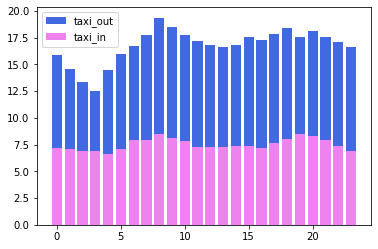

In [17]:
plt.bar(
    x=range(0, 24),
    height=avg_taxi_o,
    color='royalblue',
    label='taxi_out'
)
plt.bar(
    x=range(0, 24),
    height=avg_taxi_i,
    color='violet',
    label='taxi_in'
)
plt.legend()
plt.show()

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [18]:
_fAdelay = (df['arr_delay'] - df['dep_delay'] > 0) & (df['dep_delay'] > 15)

A_dep_delay = df[_fAdelay]['dep_delay'].mean()
A_arr_delay = df[_fAdelay]['arr_delay'].mean()
print(
    f'avg_dep_delay={A_dep_delay:.2f} (mins)\navg_arr_delay={A_arr_delay:.2f} (mins)\nratio={A_dep_delay/A_arr_delay*100:.2f}% arrival delays are caused by departure delays.'
)

avg_dep_delay=75.52 (mins)
avg_arr_delay=90.44 (mins)
ratio=83.50% arrival delays are caused by departure delays.


In [59]:
_fAlower = (df['arr_delay'] - df['dep_delay'] < 0) & (df['dep_delay'] > 15)

Al_dep_count = df[df['dep_delay'] > 15]['dep_delay'].count()
Al_arr_count = df[_fAlower]['arr_delay'].count()
print(
    f'_dep_delay={Al_dep_count:.0f} (flights)\n_arr_faster={Al_arr_count:.0f} (flights)\nratio={Al_arr_count/Al_dep_count*100:.2f}% flights were able to lower the delay from departure delays.'
)

_dep_delay=2799219 (flights)
_arr_faster=1928970 (flights)
ratio=68.91% flights were able to lower the delay from departure delays.


#### **Task 6**: How many states cover 50% of US air traffic? 

In [26]:
states = [s[1] for s in df['origin_city_name'].str.split(', ').values]
states = pd.DataFrame(data=states, columns=['state'], dtype='string')
states.shape

(15612264, 1)

In [41]:
states_traffic = states.groupby(by='state')['state'].count().sort_values(ascending=False)

In [98]:
heavy_traffic_states = 0
heavy_traffic_sum = 0
for i in range(len(states_traffic)):
    heavy_traffic_sum += states_traffic[i]
    if heavy_traffic_sum >= states_traffic.sum() * 0.5:
        heavy_traffic_states = i
        break
print(
    'The following States account for over 50% of US air traffic\n',
    f'{[(states_traffic.index[i], states_traffic[i]) for i in range(heavy_traffic_states)]}',
    # f'{[states_traffic[i] for i in range(heavy_traffic_states)]}\n',
    f'Coverage: {heavy_traffic_sum/states_traffic.sum()*100:.2f}% of {states_traffic.sum()} flights in Y2018-2019.'
)

The following States account for over 50% of US air traffic
 [('CA', 1711233), ('TX', 1540765), ('FL', 1134336), ('IL', 978263), ('GA', 834077), ('NY', 803320), ('NC', 718849)] Coverage: 53.37% of 15612264 flights in Y2018-2019.


#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

In [58]:
dep_delay_count = df[df['dep_delay'] > 0]['dep_delay'].count()
arr_faster_count = df[(df['arr_delay']-df['dep_delay']<0) & (df['dep_delay']>0)]['arr_delay'].count()
print(f'p={arr_faster_count/dep_delay_count:.4f}')

p=0.7027


#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

In [80]:
df['distance'].describe().apply('{0:.2f}'.format)
_long = (df['distance'] > 1000)
_medium = (df['distance'] > 350) & (df['distance'] <=1000)
_short = (df['distance'] <= 350)

In [100]:
# df[_long].groupby(by=['dep_time'])['dep_time'].count().sort_values(ascending=False).head(10)
print('LONG', pd.value_counts(df[_long]['dep_time'].dt.hour).head(1))
print('MEDIUM', pd.value_counts(df[_medium]['dep_time'].dt.hour).head(1))
print('SHORT', pd.value_counts(df[_short]['dep_time'].dt.hour).head(1))

LONG  7    288036
Name: dep_time, dtype: int64
MEDIUM  12    482125
Name: dep_time, dtype: int64
SHORT  17    260479
Name: dep_time, dtype: int64


#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

In [86]:
df.groupby(by='origin_city_name')['origin_city_name'].count().sort_values(ascending=False).head(10)

origin_city_name
Chicago, IL              933491
Atlanta, GA              779957
New York, NY             582299
Dallas/Fort Worth, TX    570595
Denver, CO               542936
Los Angeles, CA          494704
Charlotte, NC            490370
Houston, TX              465125
Washington, DC           461425
Seattle, WA              375331
Name: origin_city_name, dtype: int64

In [97]:
print(
    "Those 10 airports cover about",
    f"{df.groupby(by='origin_city_name')['origin_city_name'].count().sort_values(ascending=False).head(10).sum()/df.shape[0]*100:.2f}%",
    "of total US air trafic in Y2018-2019."
)

Those 10 airports cover about 36.49% of total US air trafic in Y2018-2019.


#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?

In [6]:
_f_firstweek = (df['fl_date'].dt.month == 1) & (df['fl_date'].dt.day <=7)
# df[_f_firstweek].shape
df['mkt_unique_carrier'].value_counts()

AA    4024725
DL    3454878
UA    3022901
WN    2659171
AS     840708
B6     590482
NK     375020
F9     250584
G4     199635
HA     177007
VX      17153
Name: mkt_unique_carrier, dtype: Int64

### <span style='color:magenta'> DataFrame Trim Down </span>

In [23]:
filename = '../_flights_trim.csv'
df = pd.read_csv(filename, engine='c', low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605076 entries, 0 to 15605075
Data columns (total 22 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   fl_date              object
 1   mkt_unique_carrier   object
 2   origin               object
 3   dest                 object
 4   crs_dep_time         int64 
 5   dep_time             int64 
 6   dep_delay            int64 
 7   taxi_out             int64 
 8   taxi_in              int64 
 9   crs_arr_time         int64 
 10  arr_time             int64 
 11  arr_delay            int64 
 12  cancelled            int64 
 13  crs_elapsed_time     int64 
 14  actual_elapsed_time  int64 
 15  air_time             int64 
 16  distance             int64 
 17  carrier_delay        int64 
 18  weather_delay        int64 
 19  nas_delay            int64 
 20  security_delay       int64 
 21  late_aircraft_delay  int64 
dtypes: int64(18), object(4)
memory usage: 2.6+ GB


In [24]:
df.head()

,fl_date,mkt_unique_carrier,origin,dest,crs_dep_time,dep_time,dep_delay,taxi_out,taxi_in,crs_arr_time,...,cancelled,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2018-07-30,DL,ATL,BWI,1803,1759,-4,16,7,2010,...,0,127,107,84,577,0,0,0,0,0
1,2018-07-30,DL,ATL,MIA,1622,1622,0,13,5,1823,...,0,121,105,87,594,0,0,0,0,0
2,2018-07-30,DL,MIA,ATL,1905,1911,6,12,14,2112,...,0,127,112,86,594,0,0,0,0,0
3,2018-07-30,DL,ATL,FLL,1000,1015,15,14,3,1202,...,0,122,99,82,581,0,0,0,0,0
4,2018-07-30,DL,FLL,ATL,1242,1248,6,56,12,1442,...,0,120,152,84,581,6,0,32,0,0


In [25]:
# update dtypes
date_obj = ['fl_date']
str_obj = ['mkt_unique_carrier', 'origin', 'dest']
time_obj = ['crs_dep_time', 'dep_time', 'crs_arr_time', 'arr_time']
df[date_obj] = df[date_obj].astype(dtype='string')
df[str_obj] = df[str_obj].astype(dtype='string')
df.iloc[:, 6:9] = df.iloc[:, 6:9].astype(dtype='int16')
df.iloc[:, 11:] = df.iloc[:, 11:].astype(dtype='int16')
# update time obj
for t in time_obj:
    df[t] = df[t].astype(dtype='string').str.zfill(4)
    df[t].replace(to_replace={'2400': '0000'}, inplace=True)
    df[t] = df['fl_date'] + df[t]
    df[t] = pd.to_datetime(df[t], format='%Y-%m-%d%H%M', errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605076 entries, 0 to 15605075
Data columns (total 22 columns):
 #   Column               Dtype         
---  ------               -----         
 0   fl_date              string        
 1   mkt_unique_carrier   string        
 2   origin               string        
 3   dest                 string        
 4   crs_dep_time         datetime64[ns]
 5   dep_time             datetime64[ns]
 6   dep_delay            int16         
 7   taxi_out             int16         
 8   taxi_in              int16         
 9   crs_arr_time         datetime64[ns]
 10  arr_time             datetime64[ns]
 11  arr_delay            int16         
 12  cancelled            int16         
 13  crs_elapsed_time     int16         
 14  actual_elapsed_time  int16         
 15  air_time             int16         
 16  distance             int16         
 17  carrier_delay        int16         
 18  weather_delay        int16         
 19  nas_delay          

In [26]:
df.head()

,fl_date,mkt_unique_carrier,origin,dest,crs_dep_time,dep_time,dep_delay,taxi_out,taxi_in,crs_arr_time,...,cancelled,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2018-07-30,DL,ATL,BWI,2018-07-30 18:03:00,2018-07-30 17:59:00,-4,16,7,2018-07-30 20:10:00,...,0,127,107,84,577,0,0,0,0,0
1,2018-07-30,DL,ATL,MIA,2018-07-30 16:22:00,2018-07-30 16:22:00,0,13,5,2018-07-30 18:23:00,...,0,121,105,87,594,0,0,0,0,0
2,2018-07-30,DL,MIA,ATL,2018-07-30 19:05:00,2018-07-30 19:11:00,6,12,14,2018-07-30 21:12:00,...,0,127,112,86,594,0,0,0,0,0
3,2018-07-30,DL,ATL,FLL,2018-07-30 10:00:00,2018-07-30 10:15:00,15,14,3,2018-07-30 12:02:00,...,0,122,99,82,581,0,0,0,0,0
4,2018-07-30,DL,FLL,ATL,2018-07-30 12:42:00,2018-07-30 12:48:00,6,56,12,2018-07-30 14:42:00,...,0,120,152,84,581,6,0,32,0,0


In [27]:
df.drop(index=df[df['air_time'] < 0].index, inplace=True)
df.shape

(15605071, 22)

In [28]:
df['arr_delay'].sort_values().head()

2923350   -475
3348020   -260
3348067   -258
3347985   -254
3348156   -253
Name: arr_delay, dtype: int16

### <span style='color:magenta'> Possible Features </span>

In [29]:
dff = df[(df['arr_delay'] > 0) & (df['arr_delay'] < 300)][
    [
        'arr_delay',          # target value
        'mkt_unique_carrier', # category for avg_carrier_delay
        'origin',             # dep_weather
        'crs_dep_time',       # avg_dep_traffic / check_weather
        'dest',               # arr_weather
        'crs_arr_time',       # avg_arr_traffic / check_weather
        'crs_elapsed_time',   # this one should work the same as distance
        'actual_elapsed_time',# ac_e_time - crs_e_time = traffic delay on both ends, could be categorized into nas_delay
        'distance',           # this one should work the same as crs_elapsed_time*
        'carrier_delay',      # avg_carrier_delay
        'weather_delay',      # avg_extreme_weather_delay, based on weather info, should be 0 for most
        'nas_delay',          # this relates to air_traffic and non-extreme weather_effect
        'security_delay',     # very minimal impact, drop column later
        'late_aircraft_delay' # avg_late_aircraft_delay per carrier?/airport?
    ]
]
dff.drop(index=dff[dff['security_delay'] > 0].index, inplace=True)
dff.drop(columns=['security_delay'], inplace=True)
dff.info()

,arr_delay,mkt_unique_carrier,origin,crs_dep_time,dest,crs_arr_time,crs_elapsed_time,actual_elapsed_time,distance,carrier_delay,weather_delay,nas_delay,late_aircraft_delay
4,38,DL,FLL,2018-07-30 12:42:00,ATL,2018-07-30 14:42:00,120,152,581,6,0,32,0
5,13,DL,MSP,2018-07-30 20:31:00,SFO,2018-07-30 22:50:00,259,274,1589,0,0,0,0
9,21,DL,MDW,2018-07-30 06:00:00,ATL,2018-07-30 08:49:00,109,128,591,0,0,21,0
12,6,DL,ALB,2018-07-30 18:15:00,ATL,2018-07-30 20:53:00,158,146,853,0,0,0,0
13,18,DL,ATL,2018-07-30 15:11:00,ALB,2018-07-30 17:35:00,144,149,853,0,0,18,0


In [30]:
dff.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5407500 entries, 4 to 15605073
Data columns (total 13 columns):
 #   Column               Dtype         
---  ------               -----         
 0   arr_delay            int16         
 1   mkt_unique_carrier   string        
 2   origin               string        
 3   crs_dep_time         datetime64[ns]
 4   dest                 string        
 5   crs_arr_time         datetime64[ns]
 6   crs_elapsed_time     int16         
 7   actual_elapsed_time  int16         
 8   distance             int16         
 9   carrier_delay        int16         
 10  weather_delay        int16         
 11  nas_delay            int16         
 12  late_aircraft_delay  int16         
dtypes: datetime64[ns](2), int16(8), string(3)
memory usage: 330.0 MB


In [31]:
dff.to_csv('../_flights_feat.csv', index=False)